In [25]:
# 라이브러리 import
import os
import json
import pandas as pd

### 이미지 데이터 -1 온도 데이터 Range 확인
---
이미지데이터 -2 폴더에는 Temperature 폴더가 없음  
**288개 시편 dict 생성 후 dataframe화** 

In [67]:
path = 'G:\라벨링데이터\기계적 특성치 데이터'

files = os.listdir(path)
print(f'전체 파일 갯수 : {len(files)}')
sus_list = [file for file in files if file.split('_')[2] == 'sus']
print(f'sus 파일 갯수 : {len(sus_list)}')

temp_dic = {}
fail_list = [] # temp 폴더 없는 시편 list
for idx, sus_item in enumerate(sus_list):
    item_temp_list = []
    tem_dir = os.path.join(path, sus_item,'melt_temperature') # temp dir 생성

    # temperature folder 없는 시편 발견
    try: 
        tem_files = os.listdir(tem_dir) # 한 폴더(시편) file list 생성
        for tem_file in tem_files: 
            tem_file = os.path.join(tem_dir, tem_file) 
            with open(tem_file, 'r', encoding= 'utf-8-sig') as f:
                json_data = json.load(f)
                item_temp_list.append(int(json_data['max_temperature']))
        
        temp_dic[sus_item.split('_')[0]] = item_temp_list
        print(f'{sus_item} 시편 => 완료 ')

    except Exception as e:
        fail_list.append(sus_item)
        print(f'{sus_item} 시편 => {e}\nmax_temperature folder 없음')
        pass

print(f'dictionary 변환 안됨 ==> {fail_list}')

전체 파일 갯수 : 864
sus 파일 갯수 : 288
100_3_sus_90_1cycle 시편 => 완료 
101_3_sus_90_1cycle 시편 => 완료 
102_3_sus_90_1cycle 시편 => 완료 
103_3_sus_90_1cycle 시편 => 완료 
104_3_sus_90_1cycle 시편 => 완료 
105_3_sus_90_1cycle 시편 => 완료 
106_3_sus_90_1cycle 시편 => 완료 
107_3_sus_90_1cycle 시편 => 완료 
108_3_sus_90_1cycle 시편 => 완료 
109_3_sus_90_1cycle 시편 => 완료 
10_3_sus_0_1cycle 시편 => 완료 
110_3_sus_90_1cycle 시편 => 완료 
111_3_sus_90_1cycle 시편 => 완료 
112_3_sus_90_1cycle 시편 => 완료 
113_3_sus_90_2cycle 시편 => 완료 
114_3_sus_90_2cycle 시편 => 완료 
115_3_sus_90_2cycle 시편 => 완료 
116_3_sus_90_2cycle 시편 => 완료 
117_3_sus_90_2cycle 시편 => 완료 
118_3_sus_90_2cycle 시편 => 완료 
119_3_sus_90_2cycle 시편 => 완료 
11_3_sus_0_1cycle 시편 => 완료 
120_3_sus_90_2cycle 시편 => 완료 
121_3_sus_90_2cycle 시편 => 완료 
122_3_sus_90_2cycle 시편 => 완료 
123_3_sus_90_2cycle 시편 => 완료 
124_3_sus_90_2cycle 시편 => 완료 
125_3_sus_90_2cycle 시편 => 완료 
126_3_sus_90_2cycle 시편 => 완료 
127_3_sus_90_2cycle 시편 => 완료 
128_3_sus_90_2cycle 시편 => 완료 
129_3_sus_90_3cycle 시편 => 완료 
12_3_sus_0_1c

In [68]:
len(fail_list)

145

In [69]:
len(temp_dic)

143

In [70]:
res = pd.DataFrame.from_dict(temp_dic, orient='index')
res = res.transpose()
res

,100,101,102,103,104,105,106,107,108,109,...,91,92,93,94,95,96,97,98,99,9
0,1339.0,1152.0,1261.0,1475.0,1392.0,1197.0,1197.0,1435.0,1428.0,975.0,...,1102.0,1319.0,1188.0,1186.0,956.0,1226.0,1445.0,1476.0,1660.0,1164.0
1,1351.0,956.0,1217.0,1176.0,1385.0,1131.0,1256.0,1142.0,956.0,1050.0,...,1157.0,1446.0,1396.0,1119.0,1143.0,1413.0,998.0,1240.0,1309.0,1095.0
2,1367.0,1165.0,1091.0,1317.0,1435.0,1152.0,956.0,1252.0,1197.0,1002.0,...,1104.0,956.0,1133.0,1105.0,1016.0,956.0,1180.0,1283.0,1340.0,1176.0
3,1201.0,1069.0,1177.0,956.0,1268.0,1117.0,1181.0,956.0,1044.0,1031.0,...,1115.0,1296.0,1100.0,1139.0,1088.0,1297.0,1125.0,1295.0,956.0,1147.0
4,1337.0,1127.0,1168.0,1314.0,1411.0,1394.0,1236.0,1269.0,1236.0,1051.0,...,956.0,956.0,956.0,956.0,956.0,956.0,1226.0,1300.0,1322.0,1185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,956.0,1311.0,1121.0,1226.0,1070.0,1050.0,NaN,NaN,NaN,NaN
671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1034.0,956.0,1092.0,1254.0,1099.0,1114.0,NaN,NaN,NaN,NaN
672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1095.0,1334.0,1182.0,956.0,1029.0,1245.0,NaN,NaN,NaN,NaN
673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1073.0,1294.0,1104.0,1213.0,1003.0,1196.0,NaN,NaN,NaN,NaN


In [72]:
res.describe()

,100,101,102,103,104,105,106,107,108,109,...,91,92,93,94,95,96,97,98,99,9
count,229.000000,229.00000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,...,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,229.000000,229.000000,229.000000,275.000000
mean,1310.886463,1126.69869,1170.187773,1247.493450,1297.187773,1115.449782,1193.296943,1199.716157,1180.864629,1031.877729,...,1085.241481,1290.149630,1149.173333,1133.968889,1042.520000,1248.850370,1184.860262,1273.951965,1313.358079,1166.840000
std,155.365458,89.05272,96.529128,118.698705,151.099086,83.960117,104.841522,116.890310,122.970272,62.701835,...,63.027238,133.658995,84.917683,76.195208,51.762733,116.225887,97.818385,103.191622,128.574551,77.359502
min,956.000000,956.00000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,...,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,959.000000,956.000000,956.000000,990.000000
25%,1286.000000,1090.00000,1134.000000,1206.000000,1249.000000,1078.000000,1158.000000,1149.000000,1138.000000,1006.000000,...,1048.000000,1244.000000,1104.000000,1093.000000,1009.000000,1200.500000,1152.000000,1261.000000,1309.000000,1120.500000
50%,1364.000000,1129.00000,1180.000000,1270.000000,1313.000000,1119.000000,1205.000000,1231.000000,1197.000000,1023.000000,...,1086.000000,1305.000000,1150.000000,1136.000000,1038.000000,1256.000000,1206.000000,1290.000000,1340.000000,1162.000000
75%,1387.000000,1160.00000,1216.000000,1310.000000,1385.000000,1148.000000,1247.000000,1265.000000,1248.000000,1046.000000,...,1131.000000,1371.500000,1200.500000,1190.000000,1073.500000,1304.000000,1229.000000,1310.000000,1355.000000,1206.000000
max,1893.000000,1585.00000,1649.000000,1798.000000,1897.000000,1580.000000,1639.000000,1681.000000,1718.000000,1437.000000,...,1395.000000,1829.000000,1462.000000,1365.000000,1282.000000,1672.000000,1640.000000,1755.000000,1854.000000,1621.000000


In [75]:
res.to_csv(f'C:/Users/Chaaaaabbo/Desktop/temp_data_143ea.csv',mode ='w', header=True, encoding='utf-8-sig')

In [87]:
columns = ['item_no', 'count', 'mean', 'min', 'median', 'max']
decribe_list = []
for i in temp_dic.keys():
    data = [i, res[i].count(), res[i].mean(), res['100'].min(), res[i].median(), res[i].max()]
    decribe_list.append(data)

df = pd.DataFrame(decribe_list, columns = columns)
df.to_csv(f'C:/Users/Chaaaaabbo/Desktop/temp_data_143ea_desc.csv',mode ='w', header=True, encoding='utf-8-sig')

In [94]:
df

,item_no,count,mean,min,median,max
0,100,229,1310.886463,956.0,1364.0,1893.0
1,101,229,1126.698690,956.0,1129.0,1585.0
2,102,229,1170.187773,956.0,1180.0,1649.0
3,103,229,1247.493450,956.0,1270.0,1798.0
4,104,229,1297.187773,956.0,1313.0,1897.0
...,...,...,...,...,...,...
138,96,675,1248.850370,956.0,1256.0,1672.0
139,97,229,1184.860262,956.0,1206.0,1640.0
140,98,229,1273.951965,956.0,1290.0,1755.0
141,99,229,1313.358079,956.0,1340.0,1854.0


In [88]:
df.describe()

,count,mean,min,median,max
count,143.000000,143.000000,143.0,143.000000,143.000000
mean,386.909091,1122.223091,956.0,1123.877622,1474.293706
std,194.477954,76.542931,0.0,86.312326,185.089009
min,229.000000,986.157012,956.0,973.000000,1138.000000
25%,229.000000,1060.107273,956.0,1055.500000,1322.000000
50%,275.000000,1116.721037,956.0,1118.000000,1446.000000
75%,656.000000,1177.047273,956.0,1183.500000,1604.500000
max,675.000000,1313.358079,956.0,1364.000000,1928.000000


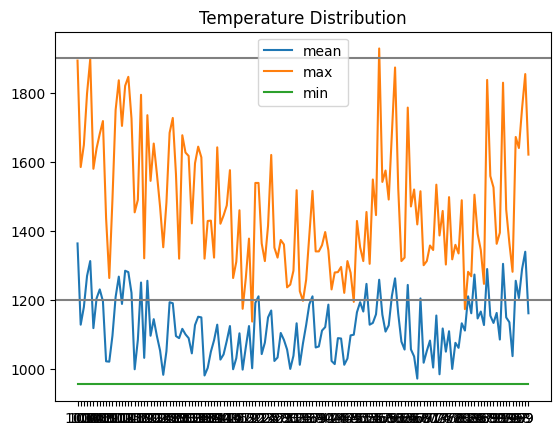

In [107]:
from matplotlib import pyplot as plt

x_values = df['item_no']
y_values_1 = df['mean']
y_values_2 = df['max']
y_values_3 = df['min']

plt.plot(x_values, y_values_1)
plt.plot(x_values, y_values_2)
plt.plot(x_values, y_values_3)
ax = plt.subplot()
# ax.set_yticks([1200, 1900])
plt.axhline(y=1200, xmin=0, xmax=1, color='grey', linestyle='solid')
plt.axhline(y=1900, xmin=0, xmax=1, color='grey', linestyle='solid')
plt.legend(['mean', 'max', 'min'])
plt.title('Temperature Distribution')
plt.show()